In [7]:
from google.colab import files
uploaded = files.upload()


Saving chinook.db to chinook (1).db


In [8]:
import sqlite3

# Connect to the uploaded database
conn = sqlite3.connect("chinook.db")

# Create a cursor object to run queries
cursor = conn.cursor()


In [9]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
tables


[('album',),
 ('artist',),
 ('customer',),
 ('employee',),
 ('genre',),
 ('invoice',),
 ('invoice_line',),
 ('media_type',),
 ('playlist',),
 ('playlist_track',),
 ('track',)]

In [10]:
import pandas as pd

df_invoice_line = pd.read_sql_query("SELECT * FROM invoice_line LIMIT 5;", conn)
df_invoice_line


,invoice_line_id,invoice_id,track_id,unit_price,quantity
0,1,1,1158,0.99,1
1,2,1,1159,0.99,1
2,3,1,1160,0.99,1
3,4,1,1161,0.99,1
4,5,1,1162,0.99,1


In [11]:
df_customer = pd.read_sql_query("SELECT * FROM customer LIMIT 5;", conn)
df_customer


,customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


In [12]:
query_top_products = """
SELECT t.name AS track_name,
       SUM(il.unit_price * il.quantity) AS total_sales,
       SUM(il.quantity) AS total_quantity_sold
FROM invoice_line il
JOIN track t ON il.track_id = t.track_id
GROUP BY t.track_id
ORDER BY total_sales DESC
LIMIT 10;
"""

df_top_products = pd.read_sql_query(query_top_products, conn)
df_top_products


,track_name,total_sales,total_quantity_sold
0,War Pigs,30.69,31
1,Are You Experienced?,13.86,14
2,Highway Chile,13.86,14
3,Put The Finger On You,12.87,13
4,Third Stone From The Sun,12.87,13
5,Hey Joe,12.87,13
6,Love Or Confusion,11.88,12
7,Radio/Video,11.88,12
8,Dead And Broken,10.89,11
9,Foxy Lady,10.89,11


In [13]:
query_revenue_region = """
SELECT billing_country,
       SUM(total) AS total_revenue,
       COUNT(invoice_id) AS total_invoices
FROM invoice
GROUP BY billing_country
ORDER BY total_revenue DESC
LIMIT 10;
"""

df_revenue_region = pd.read_sql_query(query_revenue_region, conn)
df_revenue_region


,billing_country,total_revenue,total_invoices
0,USA,1040.49,131
1,Canada,535.59,76
2,Brazil,427.68,61
3,France,389.07,50
4,Germany,334.62,41
5,Czech Republic,273.24,30
6,United Kingdom,245.52,28
7,Portugal,185.13,29
8,India,183.15,21
9,Ireland,114.84,13


In [14]:
query_monthly = """
SELECT strftime('%Y-%m', invoice_date) AS month,
       SUM(total) AS monthly_revenue,
       COUNT(invoice_id) AS total_invoices
FROM invoice
GROUP BY month
ORDER BY month;
"""

df_monthly = pd.read_sql_query(query_monthly, conn)
df_monthly


,month,monthly_revenue,total_invoices
0,2017-01,126.72,17
1,2017-02,141.57,19
2,2017-03,103.95,13
3,2017-04,142.56,17
4,2017-05,104.94,12
5,2017-06,75.24,12
6,2017-07,108.90,11
7,2017-08,88.11,11
8,2017-09,107.91,13
9,2017-10,79.20,13


In [15]:
# Final Summary / Insights
summary = [
    "💿 Top-selling tracks generate modest revenue, with 'War Pigs' leading the list.",
    "🌍 USA leads in total revenue and invoice count, followed by Canada and Brazil.",
    "🗓 Revenue fluctuates monthly, with some seasonal peaks visible across years.",
    "📈 The invoice_line table shows that most purchases are small quantities of single tracks.",
    "👥 Customers come from diverse countries, showing the global reach of the store."
]

for line in summary:
    print(line)


💿 Top-selling tracks generate modest revenue, with 'War Pigs' leading the list.
🌍 USA leads in total revenue and invoice count, followed by Canada and Brazil.
🗓 Revenue fluctuates monthly, with some seasonal peaks visible across years.
📈 The invoice_line table shows that most purchases are small quantities of single tracks.
👥 Customers come from diverse countries, showing the global reach of the store.


In [17]:
import pandas as pd

# Calculate total sales and quantity sold per track
df_track_sales = pd.read_sql_query("""
SELECT
    t.name AS track_name,
    SUM(il.unit_price * il.quantity) AS total_sales,
    SUM(il.quantity) AS total_quantity_sold
FROM track t
JOIN invoice_line il ON t.track_id = il.track_id
GROUP BY t.track_id
ORDER BY total_sales DESC
LIMIT 10;
""", conn)

df_track_sales


,track_name,total_sales,total_quantity_sold
0,War Pigs,30.69,31
1,Are You Experienced?,13.86,14
2,Highway Chile,13.86,14
3,Put The Finger On You,12.87,13
4,Third Stone From The Sun,12.87,13
5,Hey Joe,12.87,13
6,Love Or Confusion,11.88,12
7,Radio/Video,11.88,12
8,Dead And Broken,10.89,11
9,Foxy Lady,10.89,11


/tmp/ipython-input-673448181.py:10: UserWarning: Glyph 128191 (\N{OPTICAL DISC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128191 (\N{OPTICAL DISC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


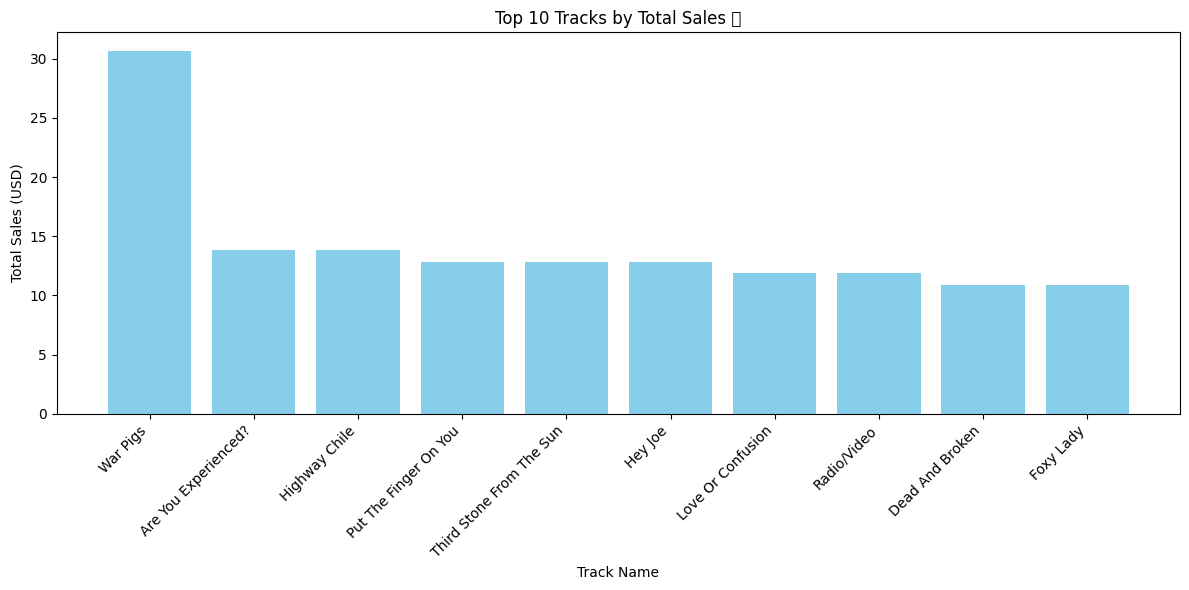

In [18]:
import matplotlib.pyplot as plt

# Plot top 10 tracks by total sales
plt.figure(figsize=(12,6))
plt.bar(df_track_sales['track_name'], df_track_sales['total_sales'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Track Name')
plt.ylabel('Total Sales (USD)')
plt.title('Top 10 Tracks by Total Sales 💿')
plt.tight_layout()
plt.show()


In [19]:
# Rank tracks by total sales using a window function
df_track_ranked = pd.read_sql_query("""
SELECT
    t.name AS track_name,
    SUM(il.unit_price * il.quantity) AS total_sales,
    SUM(il.quantity) AS total_quantity_sold,
    RANK() OVER (ORDER BY SUM(il.unit_price * il.quantity) DESC) AS rank
FROM track t
JOIN invoice_line il ON t.track_id = il.track_id
GROUP BY t.track_id
ORDER BY total_sales DESC
LIMIT 10;
""", conn)

df_track_ranked


,track_name,total_sales,total_quantity_sold,rank
0,War Pigs,30.69,31,1
1,Are You Experienced?,13.86,14,2
2,Highway Chile,13.86,14,2
3,Put The Finger On You,12.87,13,4
4,Third Stone From The Sun,12.87,13,4
5,Hey Joe,12.87,13,4
6,Love Or Confusion,11.88,12,7
7,Radio/Video,11.88,12,7
8,Dead And Broken,10.89,11,9
9,Foxy Lady,10.89,11,9


/tmp/ipython-input-661772772.py:11: UserWarning: Glyph 128191 (\N{OPTICAL DISC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128191 (\N{OPTICAL DISC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


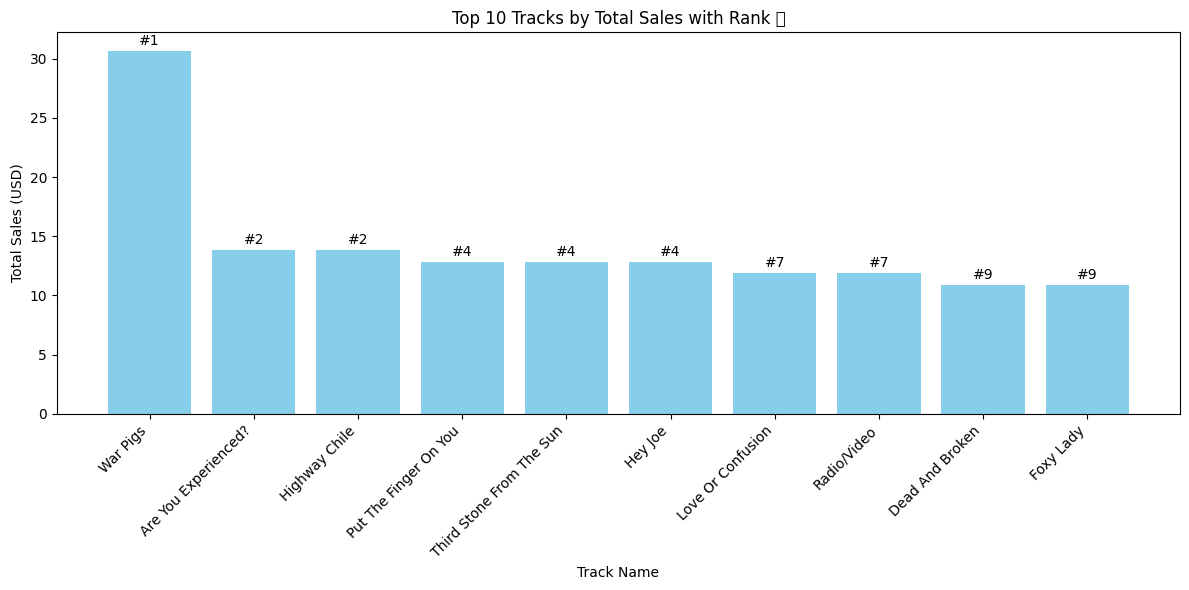

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(df_track_ranked['track_name'], df_track_ranked['total_sales'], color='skyblue')
for i, rank in enumerate(df_track_ranked['rank']):
    plt.text(i, df_track_ranked['total_sales'][i] + 0.5, f'#{rank}', ha='center')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Track Name')
plt.ylabel('Total Sales (USD)')
plt.title('Top 10 Tracks by Total Sales with Rank 💿')
plt.tight_layout()
plt.show()
